## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Importing Data

In [2]:
#Loading the dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head(10).T

Number of datapoints: 2240


0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4           5           6           7  \
ID                         5324        7446         965        6177   
Year_Birth                 1981        1967        1971        1985   
Education                   PhD      Master  Graduation         PhD   
Marital_Status          Married    Together    Divorced     Married   
Income                  58293.0     62513.0     55635.0     33454.0   
Kidhome                       1           0           0           1   
Teenhome                      0           1           1           0   
Dt_Customer          19-01-2014  09-09-2013  13-11-2012  08-05-2013   
Recency                      94          16          34          32   
MntWines                    173         520         235          76   
MntFruits                    43          42          65          10   
MntMeatProducts             118          98         164          56   
MntFishProducts              46           0          50           3   
MntSweetProducts             27          42          49           1   
MntGoldProds                 15          14          27          23   
NumDealsPurchases             5           2           4           2   
NumWebPurchases               5           6           7           4   
NumCatalogPurchases           3           4           3           0   
NumStorePurchases             6          10           7           4   
NumWebVisitsMonth             5           6           6           8   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0          

In [3]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**

* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later. 

First of all, for the missing values, I am simply going to drop the rows that have missing income values. 

In [4]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record. 

Thus to get the values I must check the newest and oldest recorded dates. 

In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Dt_Customer"].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [6]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [7]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [8]:
import plotly.express as px
fig = px.histogram(data, x="Education")
fig.show()

In [9]:
fig = px.histogram(data, x="Marital_Status")
fig.show()

**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

## Feature Engineering

### Age of customer today 

In [10]:
data["Age"] = 2021-data["Year_Birth"]

### Total spendings on various items

In [11]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

### Deriving living situation by marital status"Alone"


In [12]:
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
                                                    "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone",
                                                    "Divorced":"Alone", "Single":"Alone",})

### Feature indicating total children living in the household


In [13]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

### Feature for total members in the household

In [14]:
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

### Feature pertaining parenthood

In [15]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

### Segmenting education levels in three groups

In [16]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})

In [17]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits",
                          "MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [18]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [19]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

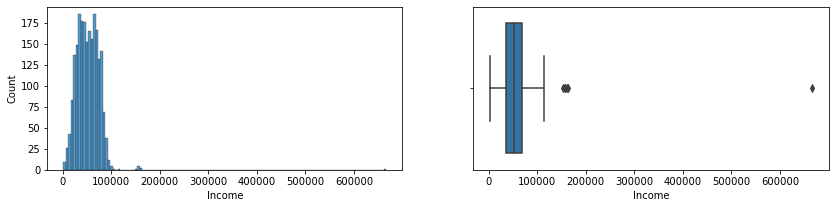

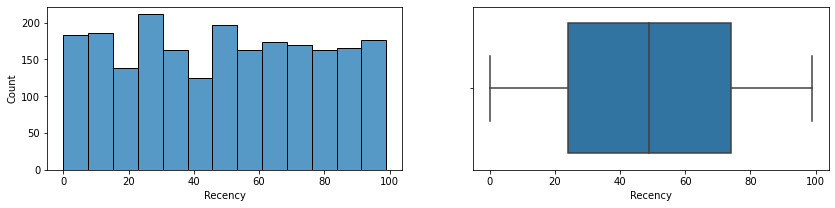

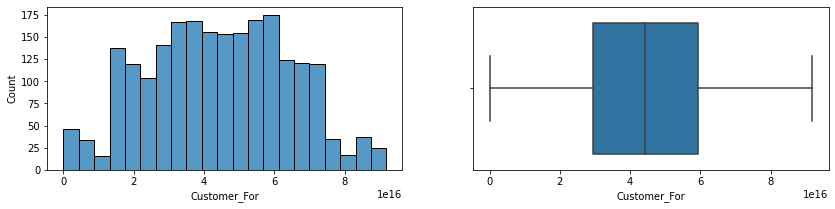

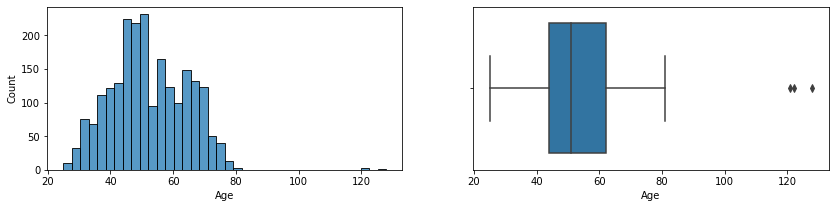

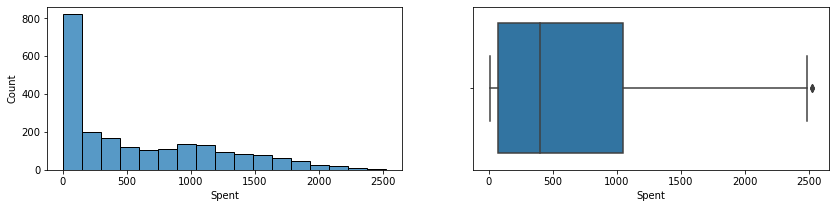

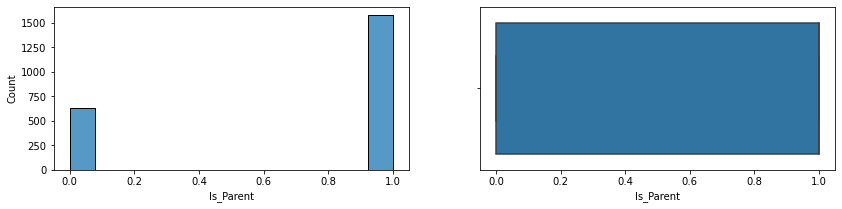

In [20]:
import seaborn as sns
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
for i in To_Plot:
    fig,ax=plt.subplots(1,2,figsize=(14,3))

    sns.histplot(data=data,x=data[i],ax=ax[0])
    sns.boxplot(data=data,x=data[i],ax=ax[1])
plt.show()

Clearly, there are a few outliers in the Income and Age features. 
I will be deleting the outliers in the data. 

In [21]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<AxesSubplot:>

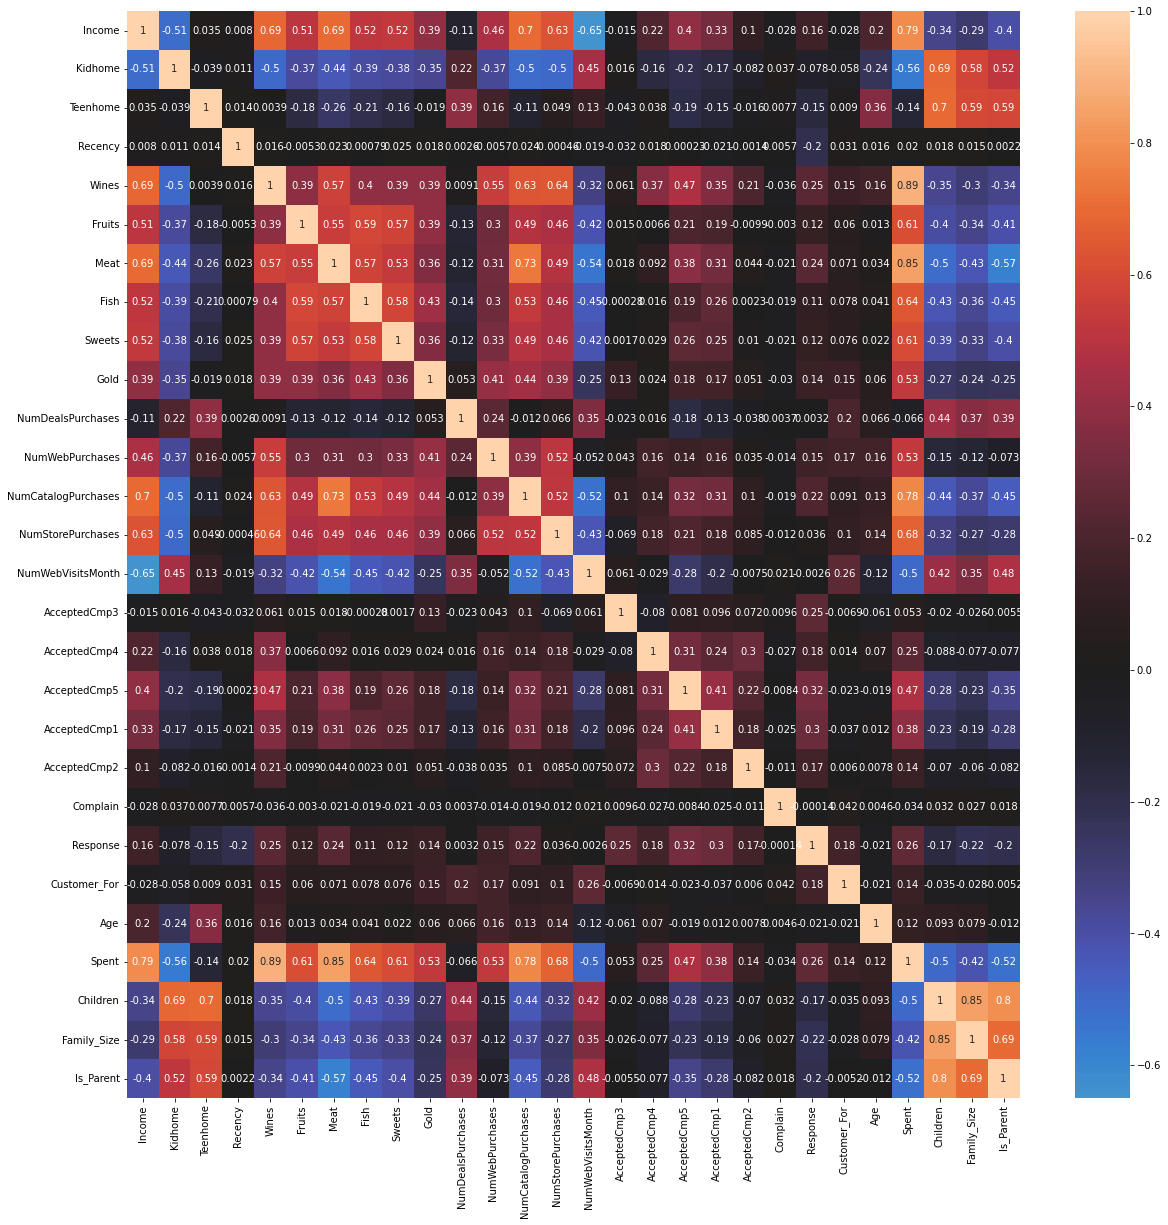

In [22]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

## Data Preprocessing 

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [23]:
cat=data.select_dtypes(exclude=["float64"])
cat.head()

Education  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0      Graduate        0         0       58    635      88   546   172   
1      Graduate        1         1       38     11       1     6     2   
2      Graduate        0         0       26    426      49   127   111   
3      Graduate        1         0       26     11       4    20    10   
4  Postgraduate        1         0       94    173      43   118    46   

   Sweets  Gold  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0      88    88  ...             0         0         1  83894400000000000   
1       1     6  ...             0         0         0  10800000000000000   
2      21    42  ...             0         0         0  40780800000000000   
3       3     5  ...             0         0         0   5616000000000000   
4      27    15  ...             0         0         0  27734400000000000   

   Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0   64   1617        Alone         0            1          0  
1   67     27        Alone         2            3          1  
2   56    776      Partner         0            2          0  
3   37     53      Partner         1            3          1  
4   40    422      Partner         1            3          1  

[5 rows x 29 columns]

### Label Encoding the object dtypes.


In [24]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in cat.columns:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


### Making a copy of data


In [25]:
ds = data.copy()

### creating a subset of dataframe by dropping the features on deals accepted and promotions


In [26]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


## Dimentionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

### Initiating PCA to reduce dimentions  features to 3

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.240719e-16  2.941552 -5.601498 -2.664198 -0.768101  2.553713   
col2  2212.0  1.475613e-17  1.729575 -4.371544 -1.335641 -0.195709  1.260498   
col3  2212.0 -1.911019e-17  1.228008 -3.540487 -0.839944 -0.030642  0.848177   

           max  
col1  7.091290  
col2  6.255219  
col3  5.609484

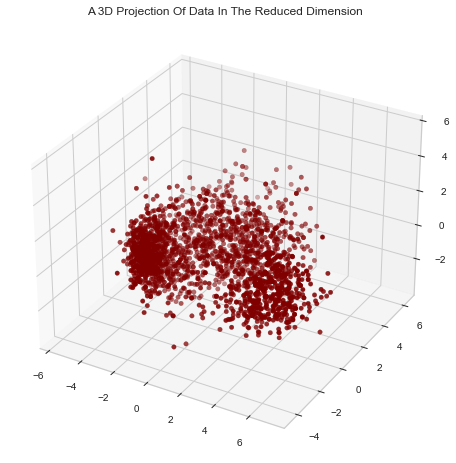

In [44]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering 

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

### Elbow method to find numbers of clusters to make.

Elbow Method to determine the number of clusters to be formed:


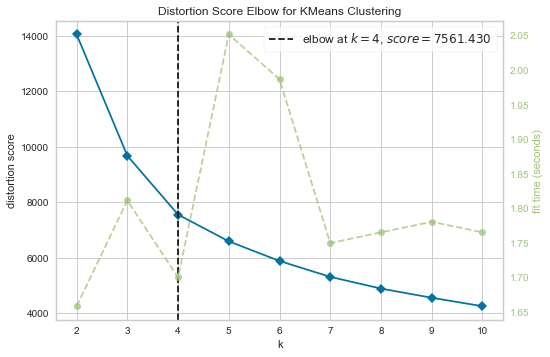

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [46]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(PCA_ds)
y_predicted

array([1, 3, 1, ..., 1, 2, 3])

In [47]:
data['cluster']=y_predicted
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    517      86   410   134   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    371      49   126    92   
3          0  26646.0        1         0       26     11       4    20     9   
4          1  58293.0        1         0       94    161      43   117    42   

   Sweets  ...  Response  Customer_For  Age  Spent  Living_With  Children  \
0      87  ...         1           646   39    901            0         0   
1       1  ...         0            27   42     21            0         2   
2      21  ...         0           294   31    499            1         0   
3       3  ...         0            16   12     47            1         1   
4      27  ...         0           157   15    318            1         1   

   Family_Size  Is_Parent  cluster  Total_Promos  
0            0          0        1             0  
1            2          1        3             0  
2            1          0        1             0  
3            2          1        0             0  
4            2          1        2             0  

[5 rows x 32 columns]

In [48]:
km.cluster_centers_

array([[-2.18852294, -1.67384434,  0.55859279],
       [ 4.21638871, -0.97689204, -0.20140468],
       [ 0.95363505,  1.91196531,  0.32513885],
       [-2.69820713,  0.77562161, -0.81314219]])

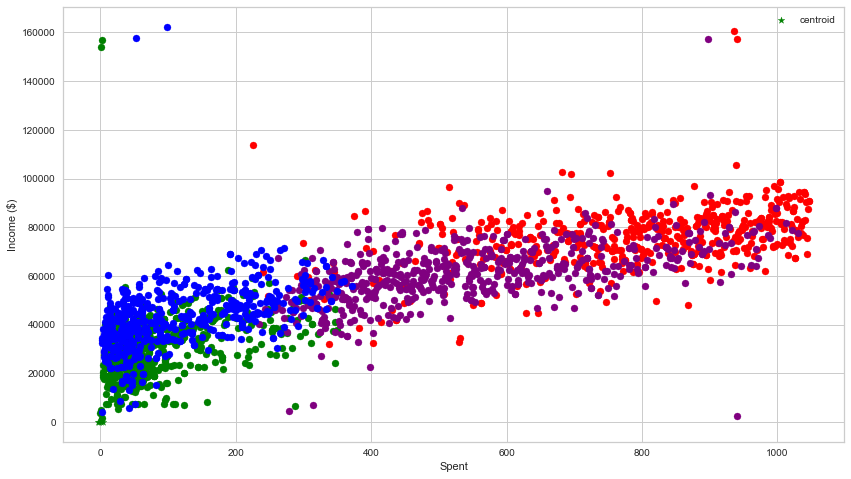

In [55]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
plt.figure(figsize=(14,8))
plt.scatter(data1.Spent,data1['Income'],color='green')
plt.scatter(data2.Spent,data2['Income'],color='red')
plt.scatter(data3.Spent,data3['Income'],color='Purple')
plt.scatter(data4.Spent,data4['Income'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='*',label='centroid')
plt.xlabel('Spent')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

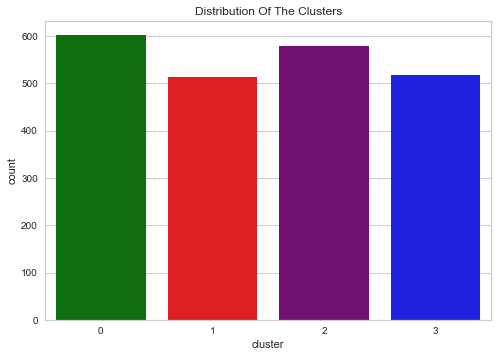

In [50]:
pal = palette =['green',"red",'purple',"blue"]
pl = sns.countplot(x=data["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## Evaluating Models 

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

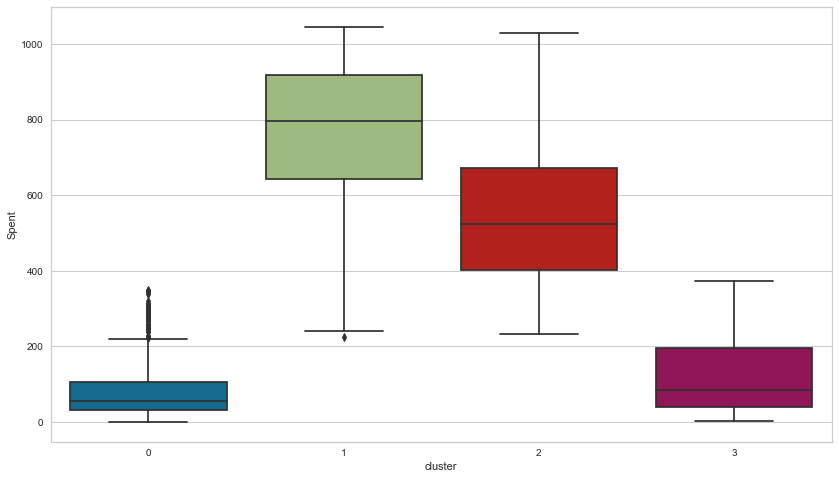

In [51]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="cluster", y="Spent", data=data)

In [52]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

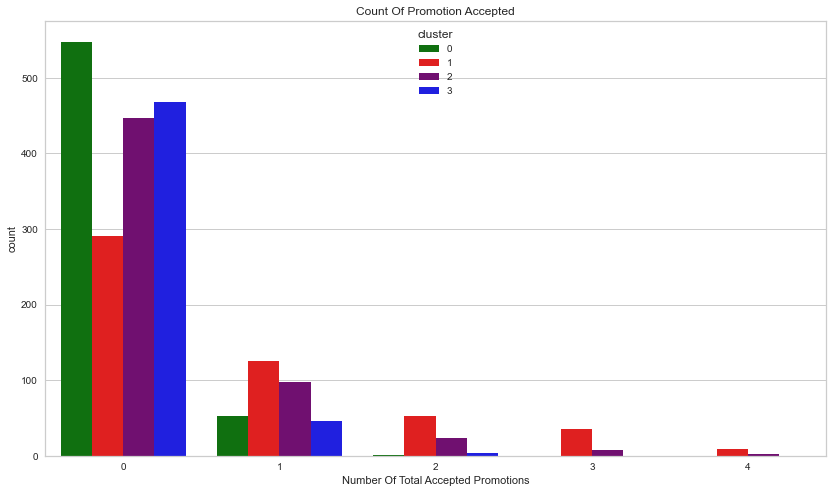

In [53]:
#Plotting count of total campaign accepted.

plt.figure(figsize=(14,8))
pl = sns.countplot(x=data["Total_Promos"],hue=data["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

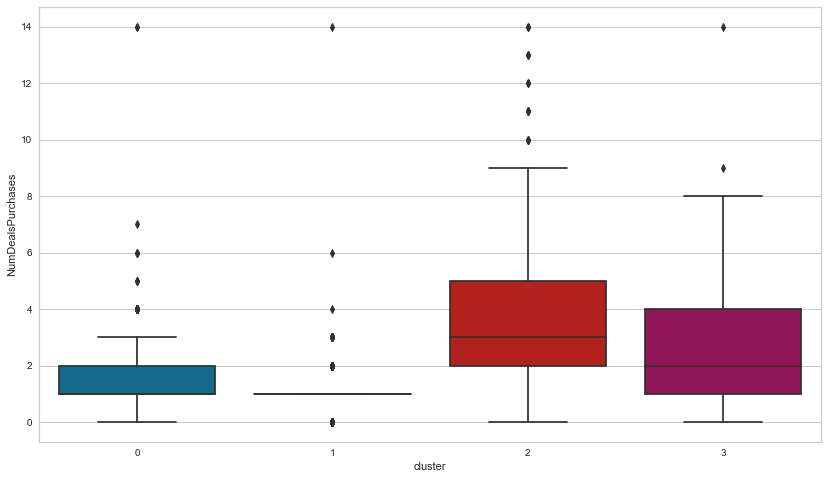

In [54]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y=data["NumDealsPurchases"],x=data["cluster"], data=data)

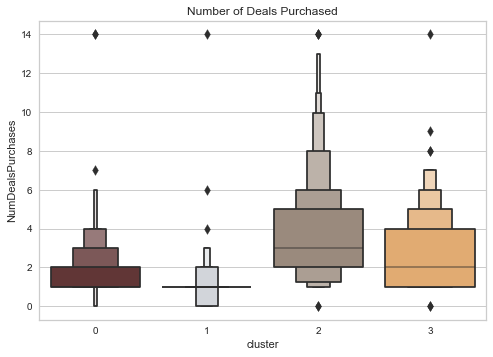

In [59]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

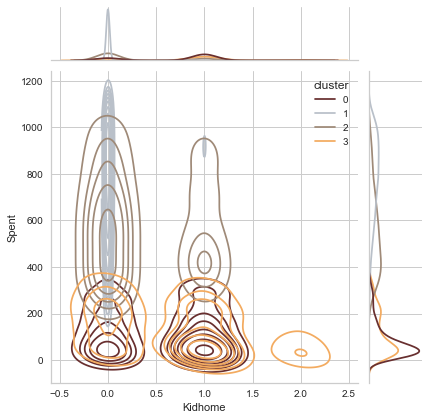

<Figure size 576x396 with 0 Axes>

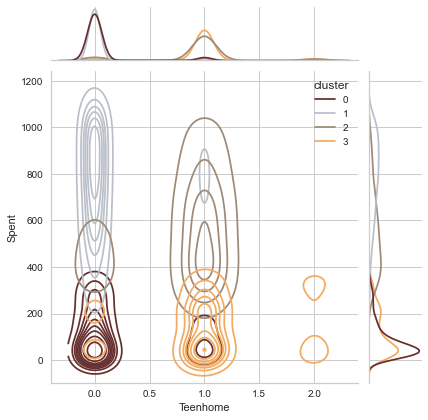

<Figure size 576x396 with 0 Axes>

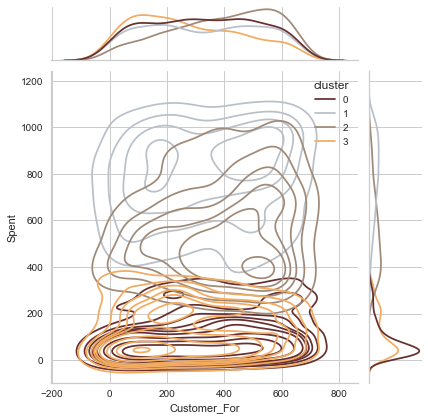

<Figure size 576x396 with 0 Axes>

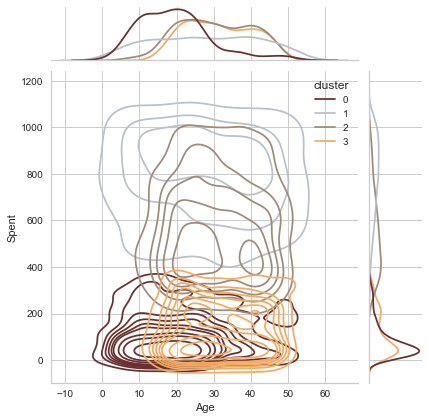

<Figure size 576x396 with 0 Axes>

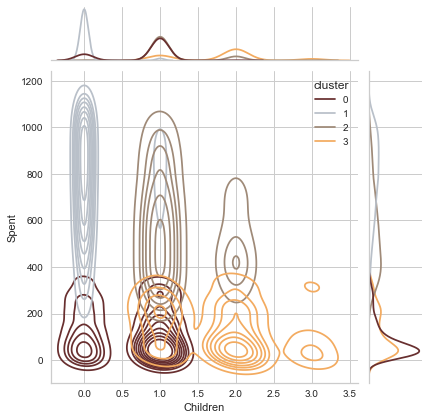

<Figure size 576x396 with 0 Axes>

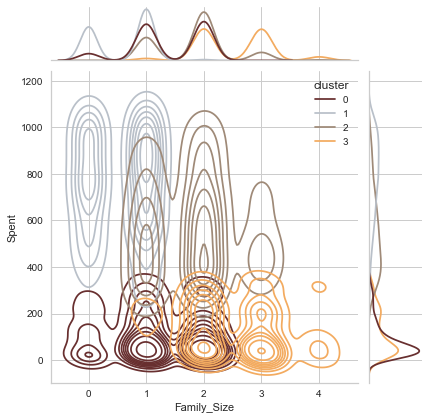

<Figure size 576x396 with 0 Axes>

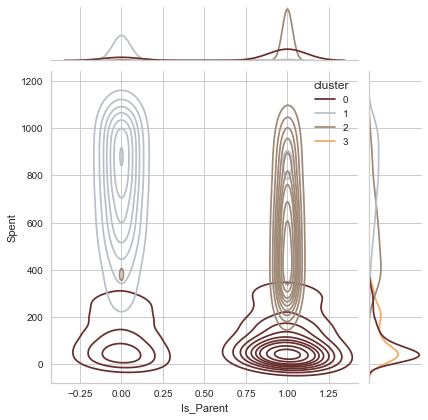

<Figure size 576x396 with 0 Axes>

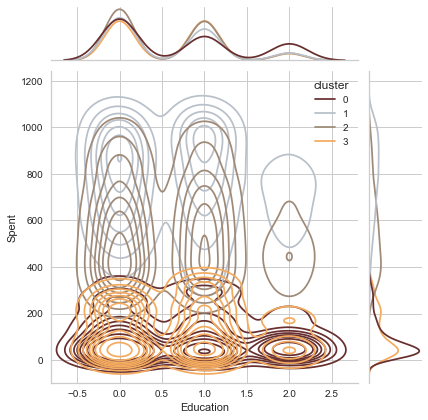

<Figure size 576x396 with 0 Axes>

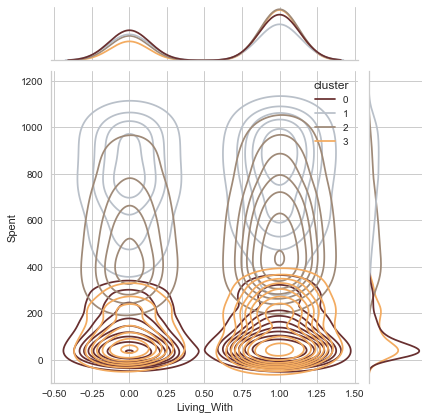

In [60]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["cluster"], kind="kde", palette=pal)
    plt.show()